# 🌌 Indivisible Stochastic Processes: Visualizing Non-Markovian Dynamics ⚛️

This Colab notebook explores the fascinating concept of "indivisible stochastic processes," primarily inspired by the theoretical work of Jacob Barandes. 🤯 The core idea is that fundamental processes in nature, potentially offering a new perspective on bridging general relativity and quantum mechanics, might be inherently non-Markovian. This means they possess "memory" – their future states depend on their entire past history, not just their current state. Such processes are "indivisible" because they cannot be broken down into smaller, independent Markovian steps over arbitrary sub-intervals of time. ⏳

We'll visualize these ideas using Python simulations of:

Brownian motion (segmented into "indivisible" slices)

Reservoir Computing (showcasing state memory)

Gaussian Processes (inherently non-Markovian functions)

Path Integral Monte Carlo (directly comparing Markovian vs. Non-Markovian dynamics)

The aim is to gain intuition about these concepts and observe how they manifest in computational models. 💻📈

## 📜 Contents / Demos

This notebook contains several Python scripts demonstrating different aspects related to non-Markovian and indivisible processes:

### 🚶‍♂️➡️🚶‍♀️ Brownian Motion Slices (indivisible_demo.py)

Simulates a 1-dimensional Brownian motion path.

Slices this continuous path into non-overlapping "indivisible" segments (vectors).

Checks and asserts the linear independence of these segments.

This illustrates how a process, though continuous, can be viewed in segments that are defined over a whole interval [t_i, t_{i+1}] but might not be simply decomposable within that interval in a Markovian sense.

Output: A plot of the Brownian motion slices.

### 🧠💧 Reservoir Computing States (reservoir_demo.py)

Implements a simple Echo State Network (a type of reservoir computer).

Feeds a noisy sine wave as input.

Samples and plots reservoir state vectors at different points in time.

Reservoir states inherently depend on the history of inputs, demonstrating a system with memory, a key characteristic of non-Markovian processes.

Output: A plot of sampled reservoir states.

### 🌀📊 Gaussian Process Samples (gp_demo.py)

Generates sample functions from a Gaussian Process (GP) using a Radial Basis Function (RBF) kernel.

GPs are inherently non-Markovian. The value of a GP at a point x is correlated with its values at all other points, not just its immediate neighbors, with the strength of correlation defined by the kernel.

Output: A plot of sample functions drawn from the GP.

### 🚶‍♂️🔄🚶‍♀️ Path Integral Monte Carlo: Markov vs. Non-Markov (non_markov_path_integral.py)

This is the most direct demonstration of indivisibility by testing the Chapman-Kolmogorov equation.

Markovian Action: Simulates a free particle using a standard (local, Markovian) path integral action. It calculates the propagator K(x_N, T | x_0, 0).

Non-Markovian Action: Introduces an action with an exponential memory kernel, making the process "indivisible" or non-local in time. It also calculates its propagator.

Chapman-Kolmogorov Test:

For the Markovian process, it verifies (within Monte Carlo error) that the propagator over the full time T can be reconstructed by integrating over an intermediate time T/2:
$K(x_N, T | x_0, 0) ≈ ∫ K(x_N, T | x_c, T/2) K(x_c, T/2 | x_0, 0) dx_c$

For the non-Markovian ("indivisible") process, it demonstrates that this equality does not hold. The process over $[0, T]$ is not simply a product/convolution of processes over $[0, T/2]$ and $[T/2, T]$, highlighting its indivisible nature.

Visualizes sample paths for both types of actions.

Output: Numerical results of the Chapman-Kolmogorov test and plots of sample paths.

### 🔑 Key Concepts Illustrated

- 🌌 Indivisible Stochastic Processes: Processes that are fundamental units, not necessarily decomposable into independent smaller steps over arbitrary time sub-intervals.

- 🧠 Non-Markovian "Memory": Systems where the future evolution depends on the entire past history, not solely on the present state.

- ↔️ Configuration Spaces: The abstract space encompassing all possible states or configurations a system can occupy.

- 📊 Linear Independence of Segments: Even if a process is "indivisible," segments taken from it (like the Brownian slices) can still be linearly independent representations.

- 🔗 Chapman-Kolmogorov Equation: A fundamental equation for Markovian processes. Its violation is a direct indicator of non-Markovian or "indivisible" character.

## 🧪🔬 Further Experiments

#### Parameter Variation:

- In indivisible_demo.py: Change time_steps or window_size. How does this affect the visual appearance and rank (should always be full rank if window_size < number of windows)?

- In reservoir_demo.py: Modify reservoir_size, leak_rate, or the input signal u. Observe changes in state diversity and rank.

- In gp_demo.py: Adjust grid_size, num_samples, or length_scale of the RBF kernel. See how the smoothness and variability of GP samples change.

- In non_markov_path_integral.py:

- Vary gamma (strength of non-locality) or tau_c (memory correlation time) in the non-Markovian action. How does the deviation from the Chapman-Kolmogorov equation change?

- Increase N (number of slices) or n_paths (MC samples) for better accuracy (at the cost of computation time).

- Try different potential functions V(x) instead of a free particle.

- Different Non-Markovian Kernels: Implement other memory kernels in the path integral demo (e.g., Gaussian memory, power-law memory).

- Higher Dimensions: Extend the Brownian motion or path integral demos to 2D or 3D.

"Degree of Indivisibility": Can you devise a quantitative metric based on the relative error in the Chapman-Kolmogorov test to measure the "degree of indivisibility"?

📚 References

Jacob Barandes' website

Interview with Jacob Barandes (2hrs)

Presentation and discussion of the idea by Jacob Barandes

🙏 Acknowledgements

This notebook is inspired by the thought-provoking theoretical work of Jacob Barandes on "indivisible stochastic processes."

Generated 5 vectors of length 200
Matrix rank = 5


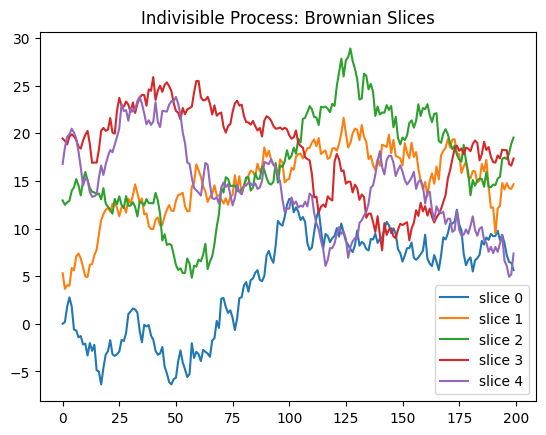

In [1]:
# indivisible_demo.py

import numpy as np
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt

def indivisible_vectors(time_steps=1000, window_size=200):
    # Simulate a 1D Brownian motion (cumulative sum of Gaussians)
    path = np.cumsum(np.random.randn(time_steps))
    # Slice into non-overlapping windows
    vectors = [path[i:i+window_size]
               for i in range(0, window_size * (time_steps // window_size), window_size)]
    return np.stack(vectors)

if __name__ == "__main__":
    V = indivisible_vectors()
    rank = matrix_rank(V)
    print(f"Generated {V.shape[0]} vectors of length {V.shape[1]}")
    print(f"Matrix rank = {rank}")
    assert rank == V.shape[0], "Vectors are not all linearly independent!"
    fig, ax = plt.subplots()
    for i, vec in enumerate(V):
        ax.plot(vec, label=f"slice {i}")
    ax.set_title("Indivisible Process: Brownian Slices")
    ax.legend()
    plt.show()

Generated 10 reservoir state vectors of dim 100
Matrix rank = 10


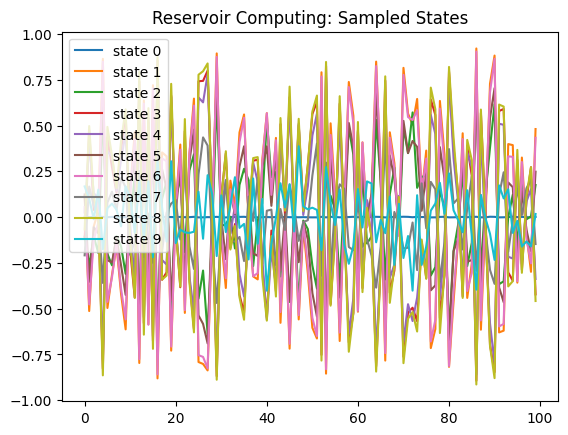

In [2]:
# reservoir_demo.py

from numpy.linalg import matrix_rank

def reservoir_states(input_seq, reservoir_size=100, leak_rate=0.3):
    # Random input & recurrent weights
    Win = (np.random.rand(reservoir_size) - 0.5) * 2.0
    W = np.random.randn(reservoir_size, reservoir_size)
    # Spectral radius < 1 for echo-state property
    rho = max(abs(np.linalg.eigvals(W)))
    W *= (0.95 / rho)

    state = np.zeros(reservoir_size)
    states = []
    for u in input_seq:
        state = (1 - leak_rate) * state + leak_rate * np.tanh(W @ state + Win * u)
        states.append(state.copy())

    # Sample 10 snapshots evenly in time
    idx = np.linspace(0, len(states)-1, 10, dtype=int)
    return np.vstack([states[i] for i in idx])

if __name__ == "__main__":
    # Example input: a noisy sine wave
    t = np.linspace(0, 4*np.pi, 500)
    u = np.sin(t) + 0.1 * np.random.randn(len(t))

    V = reservoir_states(u)
    rank = matrix_rank(V)
    print(f"Generated {V.shape[0]} reservoir state vectors of dim {V.shape[1]}")
    print(f"Matrix rank = {rank}")
    # Often < #vectors: you can adjust reservoir_size or leak_rate to improve diversity
    fig, ax = plt.subplots()
    for i, vec in enumerate(V):
        ax.plot(vec, label=f"state {i}")
    ax.set_title("Reservoir Computing: Sampled States")
    ax.legend()
    plt.show()


Generated 5 GP sample vectors of length 200
Matrix rank = 5


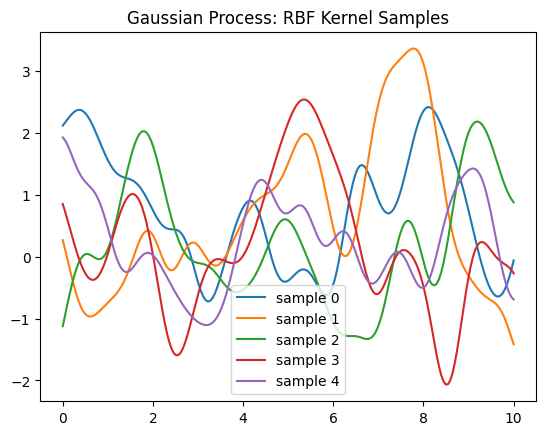

In [3]:
# gp_demo.py

import numpy as np
from numpy.linalg import matrix_rank

def rbf_kernel(x, y, ℓ=1.0):
    return np.exp(-((x - y)**2) / (2 * ℓ**2))

def gp_samples(grid_size=200, num_samples=5, length_scale=0.5):
    # Build Gram matrix on a uniform grid
    x = np.linspace(0, 10, grid_size)
    K = np.array([[rbf_kernel(xi, xj, length_scale) for xj in x] for xi in x])
    # Add jitter for numerical stability
    K += np.eye(grid_size) * 1e-8
    # Draw multiple functions
    return x, np.random.default_rng().multivariate_normal(
        mean=np.zeros(grid_size), cov=K, size=num_samples
    )

if __name__ == "__main__":
    grid, V = gp_samples()
    rank = matrix_rank(V)
    print(f"Generated {V.shape[0]} GP sample vectors of length {V.shape[1]}")
    print(f"Matrix rank = {rank}")
    assert rank == V.shape[0], "GP samples are not all linearly independent!"

    fig, ax = plt.subplots()
    for i, f in enumerate(V):
        ax.plot(grid, f, label=f"sample {i}")
    ax.set_title("Gaussian Process: RBF Kernel Samples")
    ax.legend()
    plt.show()

--- MARKOV kernel ---
K(0,T)  = 1.554e-09
∫K K    = 3.806e-09
relative error ≈ +144.92%
average Metropolis acceptance ≈ 60.71%

--- NON-MARKOV (indivisible) kernel ---
K(0,T)  = 4.139e-09
∫K K    = 6.724e-09
relative error ≈ +62.44%
average Metropolis acceptance ≈ 60.84%


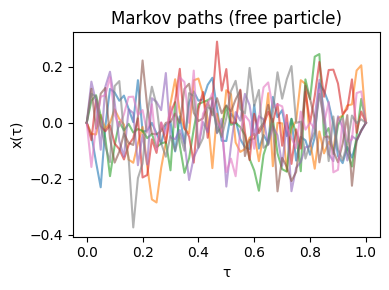

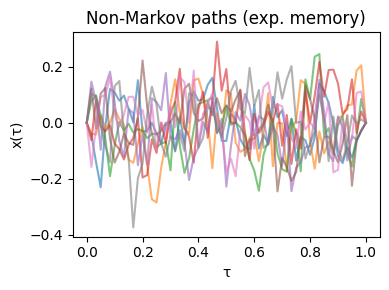

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- generic helpers ----------
def metropolis_paths(action, path, n_steps, sigma, rng):
    """Single-slice Metropolis sweeps returning acceptance rate."""
    N = len(path) - 1
    S = action(path)
    accept = 0
    for _ in range(n_steps):
        k = rng.integers(1, N)           # interior slice
        trial = path.copy()
        trial[k] += rng.normal(scale=sigma)
        dS = action(trial) - S
        if rng.random() < np.exp(-dS):
            path, S = trial, S + dS
            accept += 1
    return path, accept / n_steps, S

def mc_propagator(action, x0, xN, n_slices, n_samples, dt, prop_sigma, rng):
    """Monte-Carlo estimate of ⟨xN,T|x0,0⟩ ∝ ⟨e^{-S}⟩."""
    path = np.linspace(x0, xN, n_slices + 1)         # straight-line start
    values, acc_rates = [], []
    for _ in range(n_samples):
        path, acc, S_now = metropolis_paths(action, path, n_slices, prop_sigma, rng)
        values.append(np.exp(-S_now))
        acc_rates.append(acc)
    return np.mean(values), np.mean(acc_rates)

# ---------- MARKOV action ----------
def make_action_markov(V, m, dt):
    def action(p):
        kin = 0.5 * m * np.sum(np.diff(p)**2) / dt
        pot = dt * np.sum(V(p))
        return kin + pot
    return action

# ---------- NON-MARKOV action (exponential memory kernel) ----------
def make_action_nonmarkov(V, m, dt, gamma=1.0, tau_c=0.3):
    # Pre-compute exp(-|i-j| dt / tau_c) matrix
    Nmax = 200          # safeguard – keeps memory light
    def action(p):
        N = len(p) - 1
        idx = np.arange(N + 1)
        K = np.exp(-np.abs(idx[:, None] - idx[None, :]) * dt / tau_c)
        kin = 0.5 * m * np.sum(np.diff(p)**2) / dt
        pot = dt * np.sum(V(p))
        # double-sum memory term; factor ½ avoids double-counting
        diff = p[:, None] - p[None, :]
        nonloc = 0.25 * gamma * dt**2 * np.sum(K * diff**2)
        return kin + pot + nonloc
    return action

# ---------- parameters ----------
T      = 1.0             # total Euclidean time
N      = 60              # lattice slices
dt     = T / N
x0, xN = 0.0, 0.0
m      = 1.0
V      = lambda x: 0.0 * x          # free particle
n_paths     = 6000                  # MC samples per propagator
prop_sigma  = np.sqrt(dt)           # proposal step
rng         = np.random.default_rng(0)

# ---------- calculate propagators ----------
act_M  = make_action_markov(V, m, dt)
act_NM = make_action_nonmarkov(V, m, dt, gamma=1.0, tau_c=0.3)

# full time
K_M,  acc_M  = mc_propagator(act_M,  x0, xN, N,     n_paths, dt, prop_sigma, rng)
K_NM, acc_NM = mc_propagator(act_NM, x0, xN, N,     n_paths, dt, prop_sigma, rng)

# half time (needed for Chapman–Kolmogorov)
K_M_half  = lambda xb, xa: mc_propagator(act_M,  xa, xb, N//2, n_paths//2,
                                         dt, prop_sigma, rng)[0]
K_NM_half = lambda xb, xa: mc_propagator(act_NM, xa, xb, N//2, n_paths//2,
                                         dt, prop_sigma, rng)[0]

# approximate the midpoint integral with a small grid
xgrid = np.linspace(-3, 3, 61)
dx    = xgrid[1] - xgrid[0]
integral_M  = sum(K_M_half(xN, xc)  * K_M_half(xc, x0)  for xc in xgrid) * dx
integral_NM = sum(K_NM_half(xN, xc) * K_NM_half(xc, x0) for xc in xgrid) * dx

print("--- MARKOV kernel ---")
print(f"K(0,T)  = {K_M:.3e}")
print(f"∫K K    = {integral_M:.3e}")
print(f"relative error ≈ {(integral_M-K_M)/K_M:+.2%}")
print(f"average Metropolis acceptance ≈ {acc_M:.2%}\n")

print("--- NON-MARKOV (indivisible) kernel ---")
print(f"K(0,T)  = {K_NM:.3e}")
print(f"∫K K    = {integral_NM:.3e}")
print(f"relative error ≈ {(integral_NM-K_NM)/K_NM:+.2%}")
print(f"average Metropolis acceptance ≈ {acc_NM:.2%}")

# ---------- visualise a few sample paths ----------
def draw_paths(action, title, n_show=8):
    rng = np.random.default_rng(1)
    fig, ax = plt.subplots(figsize=(4, 3))
    for _ in range(n_show):
        p = np.linspace(x0, xN, N + 1)
        p, *_ = metropolis_paths(action, p, N*6, prop_sigma, rng)
        ax.plot(np.linspace(0, T, N + 1), p, alpha=0.6)
    ax.set_xlabel("τ")
    ax.set_ylabel("x(τ)")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

draw_paths(act_M,  "Markov paths (free particle)")
draw_paths(act_NM, "Non-Markov paths (exp. memory)")

# ================================================